# Testing the dataset

In [ ]:
from src.dataload import create_dataloader
from tqdm import tqdm
import matplotlib.pyplot as plt
dataset_name = 'UIEB'
dataset_path="data"
train_loader_UIEB, test_loader_UIEB = create_dataloader(dataset_name=dataset_name, dataset_path=dataset_path,ddp=False)
for batch_idx, (data, target, ref_path) in tqdm(enumerate(test_loader_UIEB)):
    for i in range(len(data)):
        print(data[i].shape)
        print(target[i].shape)
        print(ref_path[i])
        plt.imshow(data[i].permute(1, 2, 0))
        plt.show()
        plt.imshow(target[i].permute(1, 2, 0))
        plt.show()
    break

# Training the models

In [2]:
#!python train_noddp.py --models ["Unet"] --epochs 100

Train raw: 712 Train ref: 712 
Test raw: 178 Test ref: 178



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [0/3], Batch [0/712], Loss: 37098.8125 



 33%|███▎      | 1/3 [00:08<00:16,  8.46s/it]

Epoch [0/3], Batch [700/712], Loss: 12284.1552734375 

Epoch [1/3], Batch [0/712], Loss: 9203.0625 



 67%|██████▋   | 2/3 [00:17<00:08,  8.57s/it]

Epoch [1/3], Batch [700/712], Loss: 8316.6787109375 

Epoch [2/3], Batch [0/712], Loss: 4177.03564453125 



100%|██████████| 3/3 [00:26<00:00,  8.71s/it]

Epoch [2/3], Batch [700/712], Loss: 7336.21875 



Epoch [2/3], Batch [0/178]


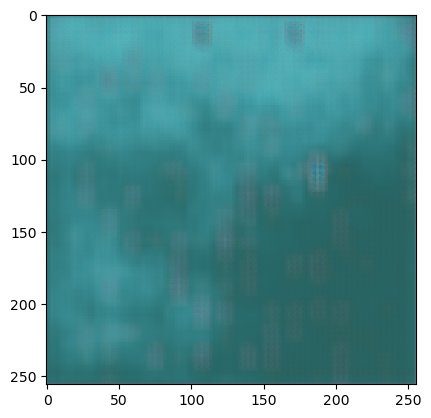

Salvando Ckpt VAE


In [2]:
from train_ import train_final
train_final(epochs = 3,\
            model_name ='VAE',\
            perceptual_loss =['vgg19'],\
            #channel_loss = ['dark_channel_loss'],\
            channel_loss = None,\
            #structural_loss=['ssim'],\
            structural_loss= None,\
            dataset_name="UIEB", dataset_path="data")

In [ ]:
from train_ import train_final

train_final(epochs=100,
            model_name='VAE',
            perceptual_loss=None, #['vgg19'],
            channel_loss=None,
            structural_loss=None,
            #pretrained = 'output/ckpt_battle/VAE_UIEB_pretrainedsemvvg19_ckpt.pth',
            dataset_name="UIEB", 
            dataset_path="data")


## DDP

### torch run multi gpu
remains with errors fro training

In [5]:
!torchrun --nnodes=2 --nproc_per_node=2 --node_rank=0 --master_pathr="10.228.252.209" --master_port=12555 main.py --nodes=2 --gpus=2 --epochs=100

usage: torchrun [-h] [--nnodes NNODES] [--nproc-per-node NPROC_PER_NODE]
                [--rdzv-backend RDZV_BACKEND] [--rdzv-endpoint RDZV_ENDPOINT]
                [--rdzv-id RDZV_ID] [--rdzv-conf RDZV_CONF] [--standalone]
                [--max-restarts MAX_RESTARTS]
                [--monitor-interval MONITOR_INTERVAL]
                [--start-method {spawn,fork,forkserver}] [--role ROLE] [-m]
                [--no-python] [--run-path] [--log-dir LOG_DIR] [-r REDIRECTS]
                [-t TEE] [--local-ranks-filter LOCAL_RANKS_FILTER]
                [--node-rank NODE_RANK] [--master-addr MASTER_ADDR]
                [--master-port MASTER_PORT] [--local-addr LOCAL_ADDR]
                [--logs-specs LOGS_SPECS]
                training_script ...
torchrun: error: unrecognized arguments: --master_pathr=10.228.252.209


### torchrun local

In [6]:
!export OMP_NUM_THREADS=1
!torchrun --nproc_per_node=2 main.py --nodes=1 --gpus=1 --epochs=1

W0823 12:56:05.405000 136886733674304 torch/distributed/run.py:779] 
W0823 12:56:05.405000 136886733674304 torch/distributed/run.py:779] *****************************************
W0823 12:56:05.405000 136886733674304 torch/distributed/run.py:779] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0823 12:56:05.405000 136886733674304 torch/distributed/run.py:779] *****************************************
Rank 0 initialized.
Loading model: Unet
Rank 0 initialized.
Loading model: Unet
14 loss functions to train with
3 models to train with
Train raw: 712 Train ref: 712 
Test raw: 178 Test ref: 178

14 loss functions to train with
3 models to train with
Train raw: 712 Train ref: 712 
Test raw: 178 Test ref: 178

Training UNet with PerceptualLoss
Epochs for UNet_PerceptualLoss:   0%|                    | 0/45 [00:00<?, ?it/s]terminate

# Testes


Train raw: 712 Train ref: 712 
Test raw: 178 Test ref: 178

Testando o modelo VAE


0it [00:00, ?it/s]

ref path:  19_img_.png
Valor mínimo de pred_img: 1
Valor máximo de pred_img: 254


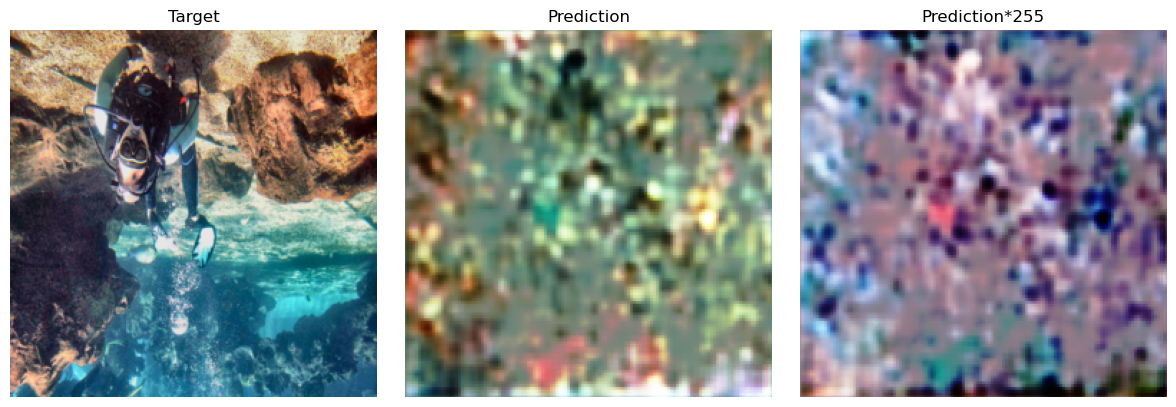

1it [00:00,  3.60it/s]


In [3]:
from src.utils import test_one_model
test_one_model(model_name='VAE', dataset_name="UIEB", dataset_path="data", ckpt_path="output/ckpt_battle/VAE_UIEB_final_ckpt.pth",save=False, plot=True, metrics=False)


In [ ]:
from src.utils import test_models
test_models()

In [ ]:
from src.utils import test_models
test_models(plot=False,metrics=True, save=True)

14 loss functions to test with
2 models to test with

Train raw: 712 Train ref: 712 
Test raw: 178 Test ref: 178

Testing: UNet with PerceptualLoss_vgg11


12it [00:14,  1.21s/it]


Metrics for UNet_PerceptualLoss_vgg11 saved to output/results_battle/UNet_PerceptualLoss_vgg11//UNet_PerceptualLoss_vgg11_metrics.txt
Testing: UNet with PerceptualLoss_vgg16


12it [00:14,  1.23s/it]


Metrics for UNet_PerceptualLoss_vgg16 saved to output/results_battle/UNet_PerceptualLoss_vgg16//UNet_PerceptualLoss_vgg16_metrics.txt
Testing: UNet with PerceptualLoss_vgg19


12it [00:14,  1.25s/it]


Metrics for UNet_PerceptualLoss_vgg19 saved to output/results_battle/UNet_PerceptualLoss_vgg19//UNet_PerceptualLoss_vgg19_metrics.txt
Testing: UNet with PerceptualLoss_alex


12it [00:13,  1.16s/it]


Metrics for UNet_PerceptualLoss_alex saved to output/results_battle/UNet_PerceptualLoss_alex//UNet_PerceptualLoss_alex_metrics.txt
Testing: UNet with PerceptualLoss_squeeze


12it [00:13,  1.16s/it]


Metrics for UNet_PerceptualLoss_squeeze saved to output/results_battle/UNet_PerceptualLoss_squeeze//UNet_PerceptualLoss_squeeze_metrics.txt
Testing: UNet with HistogramColorLoss


12it [00:13,  1.16s/it]


Metrics for UNet_HistogramColorLoss saved to output/results_battle/UNet_HistogramColorLoss//UNet_HistogramColorLoss_metrics.txt
Testing: UNet with angular_color_loss


12it [00:13,  1.16s/it]


Metrics for UNet_angular_color_loss saved to output/results_battle/UNet_angular_color_loss//UNet_angular_color_loss_metrics.txt
Testing: UNet with DarkChannelLoss


12it [00:13,  1.15s/it]


Metrics for UNet_DarkChannelLoss saved to output/results_battle/UNet_DarkChannelLoss//UNet_DarkChannelLoss_metrics.txt
Testing: UNet with LabChannelLoss


12it [00:14,  1.19s/it]


Metrics for UNet_LabChannelLoss saved to output/results_battle/UNet_LabChannelLoss//UNet_LabChannelLoss_metrics.txt
Testing: UNet with HSVChannelLoss


12it [00:14,  1.18s/it]


Metrics for UNet_HSVChannelLoss saved to output/results_battle/UNet_HSVChannelLoss//UNet_HSVChannelLoss_metrics.txt
Testing: UNet with SSIMLoss


12it [00:13,  1.15s/it]


Metrics for UNet_SSIMLoss saved to output/results_battle/UNet_SSIMLoss//UNet_SSIMLoss_metrics.txt
Testing: UNet with PSNRLoss


12it [00:13,  1.16s/it]


Metrics for UNet_PSNRLoss saved to output/results_battle/UNet_PSNRLoss//UNet_PSNRLoss_metrics.txt
Testing: UNet with MSELoss


12it [00:13,  1.16s/it]


Metrics for UNet_MSELoss saved to output/results_battle/UNet_MSELoss//UNet_MSELoss_metrics.txt
Testing: UNet with GradientLossOpenCV


12it [00:14,  1.20s/it]

Metrics for UNet_GradientLossOpenCV saved to output/results_battle/UNet_GradientLossOpenCV//UNet_GradientLossOpenCV_metrics.txt
Testing: ImageEnhancerTransformer with PerceptualLoss_vgg11



12it [00:13,  1.09s/it]

Metrics for ImageEnhancerTransformer_PerceptualLoss_vgg11 saved to output/results_battle/ImageEnhancerTransformer_PerceptualLoss_vgg11//ImageEnhancerTransformer_PerceptualLoss_vgg11_metrics.txt
Testing: ImageEnhancerTransformer with PerceptualLoss_vgg16



12it [00:13,  1.15s/it]

Metrics for ImageEnhancerTransformer_PerceptualLoss_vgg16 saved to output/results_battle/ImageEnhancerTransformer_PerceptualLoss_vgg16//ImageEnhancerTransformer_PerceptualLoss_vgg16_metrics.txt
Testing: ImageEnhancerTransformer with PerceptualLoss_vgg19



12it [00:13,  1.16s/it]


Metrics for ImageEnhancerTransformer_PerceptualLoss_vgg19 saved to output/results_battle/ImageEnhancerTransformer_PerceptualLoss_vgg19//ImageEnhancerTransformer_PerceptualLoss_vgg19_metrics.txt
Testing: ImageEnhancerTransformer with PerceptualLoss_alex


12it [00:12,  1.07s/it]

Metrics for ImageEnhancerTransformer_PerceptualLoss_alex saved to output/results_battle/ImageEnhancerTransformer_PerceptualLoss_alex//ImageEnhancerTransformer_PerceptualLoss_alex_metrics.txt
Testing: ImageEnhancerTransformer with PerceptualLoss_squeeze



12it [00:12,  1.05s/it]

Metrics for ImageEnhancerTransformer_PerceptualLoss_squeeze saved to output/results_battle/ImageEnhancerTransformer_PerceptualLoss_squeeze//ImageEnhancerTransformer_PerceptualLoss_squeeze_metrics.txt
Testing: ImageEnhancerTransformer with HistogramColorLoss



12it [00:12,  1.06s/it]

Metrics for ImageEnhancerTransformer_HistogramColorLoss saved to output/results_battle/ImageEnhancerTransformer_HistogramColorLoss//ImageEnhancerTransformer_HistogramColorLoss_metrics.txt
Testing: ImageEnhancerTransformer with angular_color_loss



12it [00:12,  1.06s/it]

Metrics for ImageEnhancerTransformer_angular_color_loss saved to output/results_battle/ImageEnhancerTransformer_angular_color_loss//ImageEnhancerTransformer_angular_color_loss_metrics.txt
Testing: ImageEnhancerTransformer with DarkChannelLoss



12it [00:12,  1.06s/it]

Metrics for ImageEnhancerTransformer_DarkChannelLoss saved to output/results_battle/ImageEnhancerTransformer_DarkChannelLoss//ImageEnhancerTransformer_DarkChannelLoss_metrics.txt
Testing: ImageEnhancerTransformer with LabChannelLoss



12it [00:13,  1.11s/it]


Metrics for ImageEnhancerTransformer_LabChannelLoss saved to output/results_battle/ImageEnhancerTransformer_LabChannelLoss//ImageEnhancerTransformer_LabChannelLoss_metrics.txt
Testing: ImageEnhancerTransformer with HSVChannelLoss


12it [00:12,  1.08s/it]

Metrics for ImageEnhancerTransformer_HSVChannelLoss saved to output/results_battle/ImageEnhancerTransformer_HSVChannelLoss//ImageEnhancerTransformer_HSVChannelLoss_metrics.txt
Testing: ImageEnhancerTransformer with SSIMLoss



12it [00:12,  1.06s/it]

Metrics for ImageEnhancerTransformer_SSIMLoss saved to output/results_battle/ImageEnhancerTransformer_SSIMLoss//ImageEnhancerTransformer_SSIMLoss_metrics.txt
Testing: ImageEnhancerTransformer with PSNRLoss



12it [00:12,  1.07s/it]

Metrics for ImageEnhancerTransformer_PSNRLoss saved to output/results_battle/ImageEnhancerTransformer_PSNRLoss//ImageEnhancerTransformer_PSNRLoss_metrics.txt
Testing: ImageEnhancerTransformer with MSELoss



12it [00:12,  1.05s/it]

Metrics for ImageEnhancerTransformer_MSELoss saved to output/results_battle/ImageEnhancerTransformer_MSELoss//ImageEnhancerTransformer_MSELoss_metrics.txt
Testing: ImageEnhancerTransformer with GradientLossOpenCV



12it [00:13,  1.10s/it]

Metrics for ImageEnhancerTransformer_GradientLossOpenCV saved to output/results_battle/ImageEnhancerTransformer_GradientLossOpenCV//ImageEnhancerTransformer_GradientLossOpenCV_metrics.txt


# Testes avaliativos

In [ ]:
import cv2
import os
from pprint import pprint as pp

#funcao que le o arquivo txt e retorna um dicionario com os valores
def extrair_valores(arquivo):
    # Dicionário para armazenar os valores das variáveis
    valores = {}

    # Abrindo o arquivo para leitura
    with open(arquivo, 'r') as f:
        for linha in f:
            # Dividindo a linha em nome da variável e valor
            variavel, valor = linha.split(':')
            # Removendo espaços em branco e convertendo o valor para float
            valores[variavel.strip()] = float(valor.strip())

    return valores
# Funcao que le a pasta e retorna o valor das metricas, a rede, e a loss function
def extract_metrics(path):
    values = extrair_valores(path)
    path = path.split('/')[::-1][1].split('_')
    #print(path[0],path[1],path[2], path[3])
    if path[1] == 'PerceptualLoss':
        #print('PerceptualLoss')
        rede = path[0]
        loss = path[2]
    else:
        #print('Other loss')
        rede = path[0]
        loss = path[1]

    
    return rede, loss, values['avg_ssim'], values['avg_psnr'], values['avg_uiqm'], values['avg_uciqe']


def listar_pastas(diretorio):
    # Lista para armazenar os endereços das pastas
    pastas = []

    # Lista todos os itens no diretório
    for item in os.listdir(diretorio):
        # Cria o caminho completo do item
        caminho_completo = os.path.join(diretorio, item)
        # Verifica se o item é uma pasta
        if os.path.isdir(caminho_completo):
            pastas.append(caminho_completo)

    return pastas

def criar_enderecos_com_metrics(pastas):
    # Lista para armazenar os novos endereços
    novos_enderecos = []

    # Itera sobre cada pasta na lista de pastas
    for pasta in pastas:
        # Cria o novo endereço juntando a pasta com 'metrics.txt'
        novo_endereco = os.path.join(pasta, 'metrics.txt')
        # Adiciona o novo endereço à lista
        novos_enderecos.append(novo_endereco)

    return novos_enderecos


# Le o documento dentro da pasta // Salva no dicionario com a key certa separada com split('_')
def read_metrics():
    battle = {
        'Unet': {},
        'Vit': {}
    }
    #lista todas as pastas dentro desse diretorio e salva o nome da pasta como um dicionario
    path = 'output/metrics_battle/'
    dir_list = listar_pastas(path)
    dir_list = criar_enderecos_com_metrics(dir_list)
    # De acordo com nome da pasta classifica em um grafico os resultados para cada metrica em cada modelo

    for i in dir_list:
        rede, loss, ssim, psnr, uiqm, uciqe = extract_metrics(i)
        if rede == 'Unet':
            battle['Unet'][loss] = [ssim, psnr, uiqm, uciqe]
        else:
            battle['Vit'][loss] = [ssim, psnr, uiqm, uciqe]
        #print(rede, loss, ssim, psnr, uiqm, uciqe)
        #print('-------------------')
    return battle


def ordenar_metricas(battle, parametro_index:int = 0):
    # Lista para armazenar os valores ordenados
    valores_ordenados = []

    # Itera sobre cada modelo no dicionario
    for modelo, losses in battle.items():
        # Itera sobre cada loss function e suas metricas
        for loss, metricas in losses.items():
            # Adiciona uma tupla com o modelo, loss function e o valor da metrica especificada
            valores_ordenados.append((modelo, loss, metricas[parametro_index]))

    # Ordena a lista com base no valor da metrica especificada
    valores_ordenados.sort(key=lambda x: x[2])

    return valores_ordenados

def ranked_metrics(rede:str = 'unet', loss:str = 'vgg16', metric:int = 0):
    """
    Função que retorna as metricas de uma rede e loss function especifica
        metric = 0 -> SSIM
        metric = 1 -> PSNR
        metric = 2 -> UIQM
        metric = 3 -> UCIQE

    """ 
    a = ordenar_metricas(read_metrics(), metric)
    c_loss = 0
    values = []
    for i in a:
        if i[0] == rede:
            if i[1] == loss:
                c_loss += 1
                values.append(i[2:])
    print(f'''Model {rede}\n    Ranked loss: {loss} q:{c_loss}\n        values{values}''')

#ranked_metrics('Unet', 'vgg16')

print(ordenar_metricas(read_metrics(), 0))

# #Falta fazer o ranquemento por grupo Channel losses, structural losses, perceptual losses
# models = ['Unet', 'Vit']
# loss = ['vgg16', 'LAB']



FileNotFoundError: [Errno 2] No such file or directory: 'output/metrics_battle/1perceptual/metrics.txt'

# Metricas Teste

In [ ]:
import numpy as np
from skimage import color, filters, io
from skimage.metrics import peak_signal_noise_ratio as PSNR
from skimage.metrics import structural_similarity as SSIM
import cv2
import os
from scipy import ndimage
import math
from metrics import *

def calculate_artifact_metric(image):
    # Apply Sobel filter to detect edges/artifacts
    sobel_edges = filters.sobel(color.rgb2gray(image))
    # Calculate the sum of edge intensities
    artifact_intensity = np.sum(sobel_edges)
    return artifact_intensity

def uciqe_modified(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l = lab[:,:,0]

    # Chroma calculation
    chroma = (lab[:,:,1]**2 + lab[:,:,2]**2)**0.5
    sc = np.std(chroma)
    conl = np.percentile(l, 99) - np.percentile(l, 1)
    us = np.mean(chroma / (l + 1e-8))

    # Calculate the artifact metric
    artifact_metric = calculate_artifact_metric(image)

    # Coefficients including the artifact metric
    c1, c2, c3, c4 = 0.4680, 0.2745, 0.2576, 0.1
    uciqe_mod = c1 * sc + c2 * conl + c3 * us - c4 * artifact_metric

    return uciqe_mod

def evaluate_image(image_path):
    image = io.imread(image_path)
    psnr_value = PSNR(image, image)  # Placeholder, replace with ground truth comparison
    ssim_value = SSIM(image, image, multichannel=True)  # Placeholder
    uiqm_value = getUIQM(image)
    uciqe_mod_value = uciqe_modified(image)

    print(f"PSNR: {psnr_value:.4f}, SSIM: {ssim_value:.4f}, UIQM: {uiqm_value:.4f}, UCIQE Modified: {uciqe_mod_value:.4f}")

def evaluate_images_in_directory(directory_path):
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            print(f"Evaluating {filename}...")
            evaluate_image(os.path.join(directory_path, filename))

if __name__ == "__main__":
    test_directory = "./generated_images"
    evaluate_images_in_directory(test_directory)
